# **NETFLIX BUSINESS CASE STUDY**
---
---

## **PROBLEM STATEMENT**

##### In the backdrop of intense global competition, in order to maximize growth and retention, Netflix must decide which types of shows/movies to produce and where to produce them. The dataset will be analyzed to:

1.   Understand the global content mix (movies vs TV shows)
2.   Identify genre-wise and country-wise trends
1.   Spot regions, movies and genres with untapped potential that Netflix could capitalize on

---



## Modules Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Upload

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 33.8MB/s]


In [ ]:
df = pd.read_csv('netflix.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **BASIC METRICS**

In [ ]:
print('Number of entries:',df.shape[0])
print('Content type:',df['type'].unique())
print('Total countries:',df['country'].nunique())

Number of entries: 8807
Content type: ['Movie' 'TV Show']
Total countries: 748


### **1.  UNI-VARIATE ANALYSIS**

#### TYPE:

In [ ]:
print(df['type'].value_counts(normalize=True)*100)

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


##### **Type-specific Insights:**
1.   Movies dominate the collection at nearly 70%, with TV Shows contributing about 30%.

#### COUNTRY:

In [ ]:
df['country'].str.split(', ').dropna().head()

,country
0,[United States]
1,[South Africa]
4,[India]
7,"[United States, Ghana, Burkina Faso, United Ki..."
8,[United Kingdom]


In [ ]:
all_countries = []
for i in df['country'].str.split(', ').dropna():
  all_countries.extend(i)

In [ ]:
all_countries = pd.Series(all_countries) # conversion of a 1D list into a Panda series

In [ ]:
all_countries.nunique()

127

In [ ]:
# 25% of total countries:
int(127*0.2)

25

In [ ]:
print('Contribution by Top 25 countries (in %):',df['country'].value_counts().head(25).values.sum()/df['country'].value_counts().values.sum()*100)

Contribution by Top 25 countries (in %): 80.44132397191575


In [ ]:
top_10_countries = df['country'].value_counts().head(10).index
top_10_countries_df = df[df['country'].isin(top_10_countries)]

In [ ]:
print(top_10_countries)

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico', 'Egypt'],
      dtype='object', name='country')


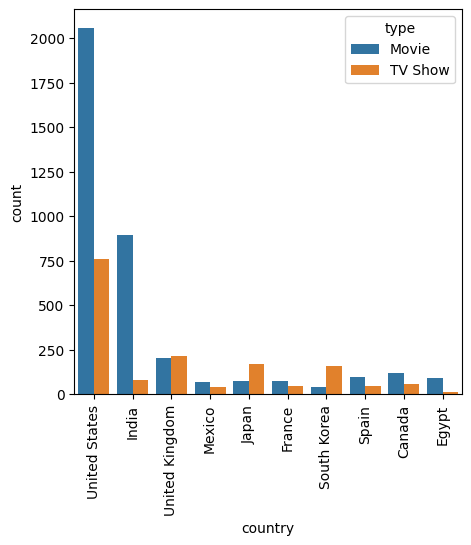

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=top_10_countries_df,x='country',hue='type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
all_cntry = all_countries.value_counts().reset_index()
all_cntry.columns = ['country','title_count']
underserved = all_cntry[all_cntry['title_count']<10]
print('Under-served countries:',underserved.shape[0])

Under-served countries: 72


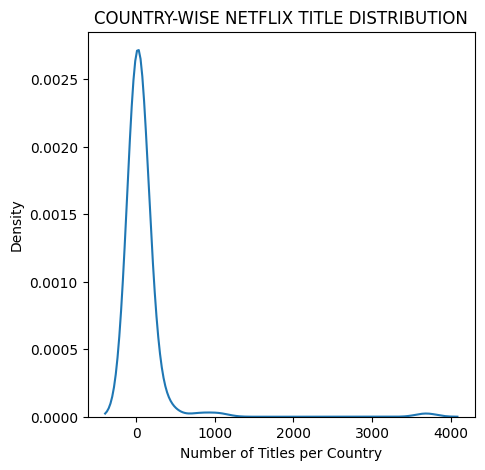

In [ ]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=all_cntry,x='title_count')
plt.title("COUNTRY-WISE NETFLIX TITLE DISTRIBUTION")
plt.xlabel("Number of Titles per Country")
plt.show()

##### **Country-specific Insights:**

1.   A clear **PARETO EFFECT** is evident, where limited regions dominate the content catalog

2.   **Top 10 contributing countries** are USA > IND > UK > MEX > JAP > FRA > ROK > ESP > CAN > EGY

1.   Almost every country in the top 10 category **leans more toward Movies**, except Japan and South Korea; UK balances both

1.   There are 72 countries with **fewer than 10 Netflix titles**, highlighting significant **under-served markets**

#### LISTED IN (GENRE):

In [ ]:
df.rename(columns={'listed_in':'genre'},inplace=True)
df['genre'].head() # combinatory nomenclature

,genre
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
df['genre'].str.split(', ').head() # list of genres dissected

,genre
0,[Documentaries]
1,"[International TV Shows, TV Dramas, TV Mysteries]"
2,"[Crime TV Shows, International TV Shows, TV Ac..."
3,"[Docuseries, Reality TV]"
4,"[International TV Shows, Romantic TV Shows, TV..."


In [ ]:
all_genres = []
for i in df['genre'].str.split(', '):
  all_genres.extend(i)

all_genres = pd.Series(all_genres) # conversion of a 1D list into a Panda series

In [ ]:
all_genres.nunique()

42

In [ ]:
print('Contribution by Top 25 Genres (in %):',all_genres.value_counts().head(25).values.sum()/all_genres.value_counts().values.sum()*100)

Contribution by Top 25 Genres (in %): 92.87895254360089


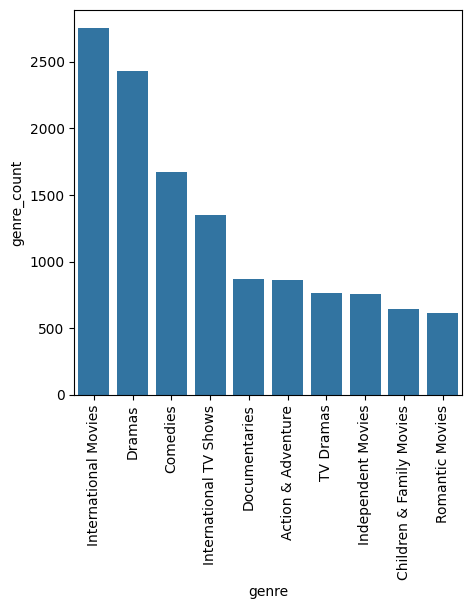

In [ ]:
plt.figure(figsize=(5,5))
all_genres = all_genres.value_counts().reset_index(name='genre_count').head(10)
all_genres.rename(columns={'index':'genre'}, inplace=True)
sns.barplot(data=all_genres,x='genre',y='genre_count')
plt.xticks(rotation=90)
plt.show()

##### **Genre-specific Insights:**

1.  There are a total of **42 unique genres** of which the **TOP 5** are: International Movies	> Dramas  > Comedies	> International TV Shows > Documentaries
2.  Top 25 genres contribute ~93%

#### DIRECTOR:

In [ ]:
all_directors = []
for i in df['director'].str.split(', ').dropna():
  all_directors.extend(i)

all_directors = pd.Series(all_directors)            # conversion to pandas Series
all_directors = all_directors.str.strip()           # remove leading/trailing spaces
all_directors = all_directors[all_directors != '']  # remove blanks
all_directors = all_directors.str.title()           # standardize to camel case
all_directors = all_directors.value_counts().reset_index(name='title_count')
all_directors.rename(columns={'index': 'director'}, inplace=True)

In [ ]:
all_directors['director'].nunique()

4989

In [ ]:
all_directors['director'].head()

,director
0,Rajiv Chilaka
1,Jan Suter
2,Raúl Campos
3,Suhas Kadav
4,Marcus Raboy


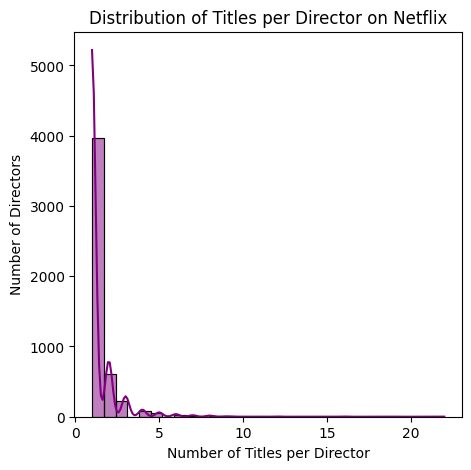

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(all_directors['title_count'], bins=30, kde=True, color="purple")
plt.xlabel("Number of Titles per Director")
plt.ylabel("Number of Directors")
plt.title("Distribution of Titles per Director on Netflix")
plt.show()

##### **Director-specific Insights:**

1.  The Netflix catalog is dominated by one-time contributors (over 80%), while only about 1% of directors have a sustained presence with more than five titles, showing a **long-tailed (highly skewed) distribution**
2.  **Top 5 directors** include Rajiv Chilaka, Jan Suter, Raúl Campos, Suhas Kadav and Marcus Raboy

#### DATE ADDED:

In [ ]:
df['date_added'].head() # string type => logical incongruity

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed')
df['date_added'] = df['date_added'].dropna()
df['date_added'].head(2)

,date_added
0,2021-09-25
1,2021-09-24


In [ ]:
df['year_added'] = df['date_added'].dt.year
titles_per_year = df['year_added'].value_counts().sort_index()

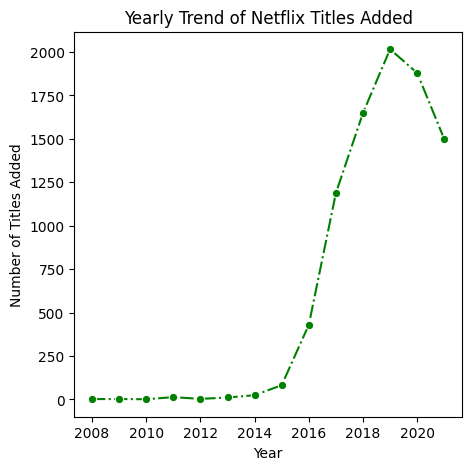

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x=titles_per_year.index,y=titles_per_year.values,marker='o',linestyle='-.',color='green')
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.title("Yearly Trend of Netflix Titles Added")
plt.show()

In [ ]:
df['month_added'] = df['date_added'].dt.month
titles_per_month = df['month_added'].value_counts().sort_index()

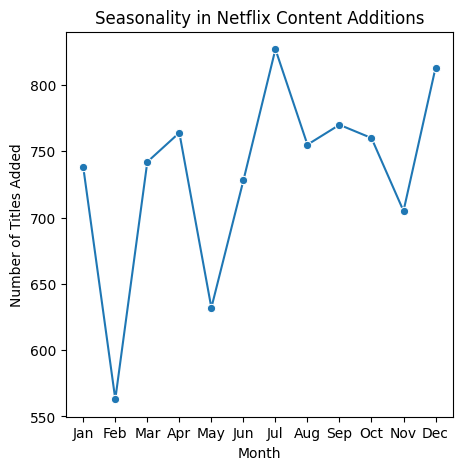

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x=titles_per_month.index, y=titles_per_month.values, marker="o")
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.title("Seasonality in Netflix Content Additions")
plt.show()

##### **Date-added-specific Insights:**

1.  The **year-wise trend** of content additions shows **steady growth until 2019**, followed by a **sharp dip in 2020–2021**, a trend probably driven by **COVID-19** disruptions

2.  Content additions showcase an **uneven distribution** across **months**; few months may dominate the catalog expansion, while others remain consistently low.

#### RELEASE YEAR:

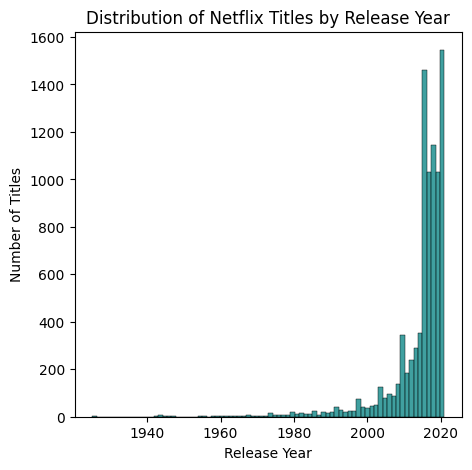

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['release_year'], bins=80, kde=False, color="teal")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Distribution of Netflix Titles by Release Year")
plt.show()

##### **Release-year-specific Insights:**

1.  Netflix’s catalog is heavily skewed toward recent decades, with most titles released after 2000 and peaking in the 2010s, while very few exist before the 1980s, reflecting a strong **RECENCY BIAS**

#### RATING:

In [ ]:
df['rating'].nunique()

17

In [ ]:
df['rating'].value_counts(normalize=True).head(3)*100

,proportion
rating,
TV-MA,36.430762
TV-14,24.537090
TV-PG,9.803476


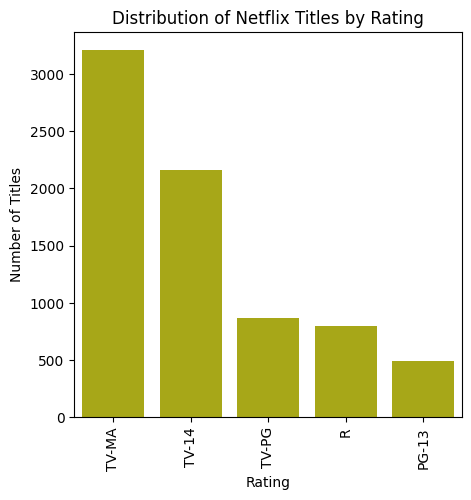

In [ ]:
plt.figure(figsize=(5,5))
rating_counts = df['rating'].value_counts().head().reset_index('rating')
rating_counts.rename(columns={'index':'count'},inplace=True)
sns.barplot(data=rating_counts, x='rating', y='count',color='y')
plt.xticks(rotation=90)
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.title("Distribution of Netflix Titles by Rating")
plt.show()

##### **Rating-specific Insights:**

1.  Most titles fall under **TV-MA, TV-14, and R**, showing Netflix’s **focus on mature and teen audiences**

*   *TV-MA (Mature Audience Only)*
*   *TV-14 (Parents Strongly Cautioned)*
*   *R (Restricted)*


#### DURATION:

In [ ]:
df = df.dropna(subset=['duration']) # imputation of NaN values

In [ ]:
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

In [ ]:
movies['duration'].head(1), tv_shows['duration'].head(2)

(0    90 min
 Name: duration, dtype: object,
 1    2 Seasons
 2     1 Season
 Name: duration, dtype: object)

In [ ]:
movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(int)
tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)

In [ ]:
print('max/min movie duration:',movies['duration_min'].min(),',',movies['duration_min'].max())
print('max/min number of tv_shows\' seasons:',tv_shows['seasons'].min(),',',tv_shows['seasons'].max())

max/min movie duration: 3 , 312
max/min number of tv_shows' seasons: 1 , 17


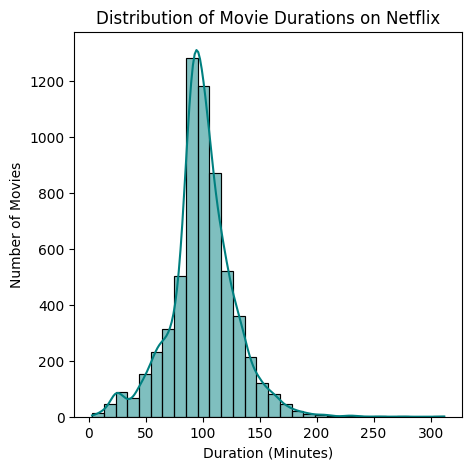

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(movies['duration_min'], bins=30, kde=True, color="teal")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Durations on Netflix")
plt.show()

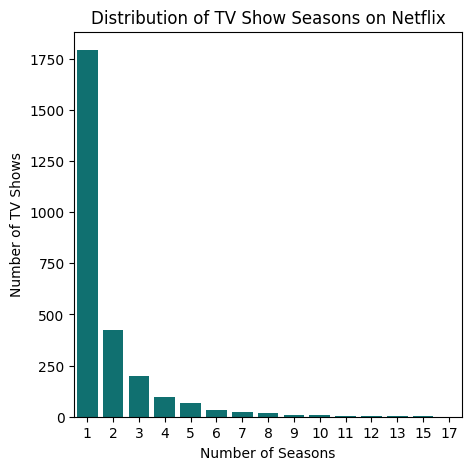

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=tv_shows['seasons'], color="teal")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of TV Shows")
plt.title("Distribution of TV Show Seasons on Netflix")
plt.show()

##### **Duration-specific Insights:**

1.  **MOVIES**: The **peak** lies around **90 minutes**, reflecting the typical feature-length standard. The shortest movie is 3 minutes and the longest is 312 minutes
2.  **TV SHOWS**: The overwhelming majority of TV shows on Netflix have only one season

### **2.  BI/MULTI-VARIATE ANALYSIS**

#### COUNTRY V/S RATING:

In [ ]:
top_5_ratings = df['rating'].value_counts().head().index
top_5_countries = df['country'].value_counts().head()
top_countries_df = df[df['country'].isin(top_5_countries.index)].copy()

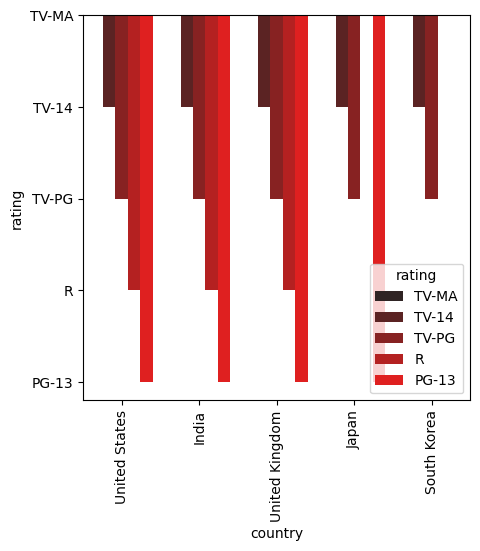

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=top_countries_df,x='country',y='rating',hue='rating',palette='dark:r')
plt.xticks(rotation=90)
plt.show()

##### **Insights:**

1.  **Dominance of Mature Content**: Ratings like TV-MA and TV-14 appear to be the most frequent **across the top contributing countries**, indicating a focus on content for mature and young adult audiences.

#### DIRECTOR V/S GENRE:

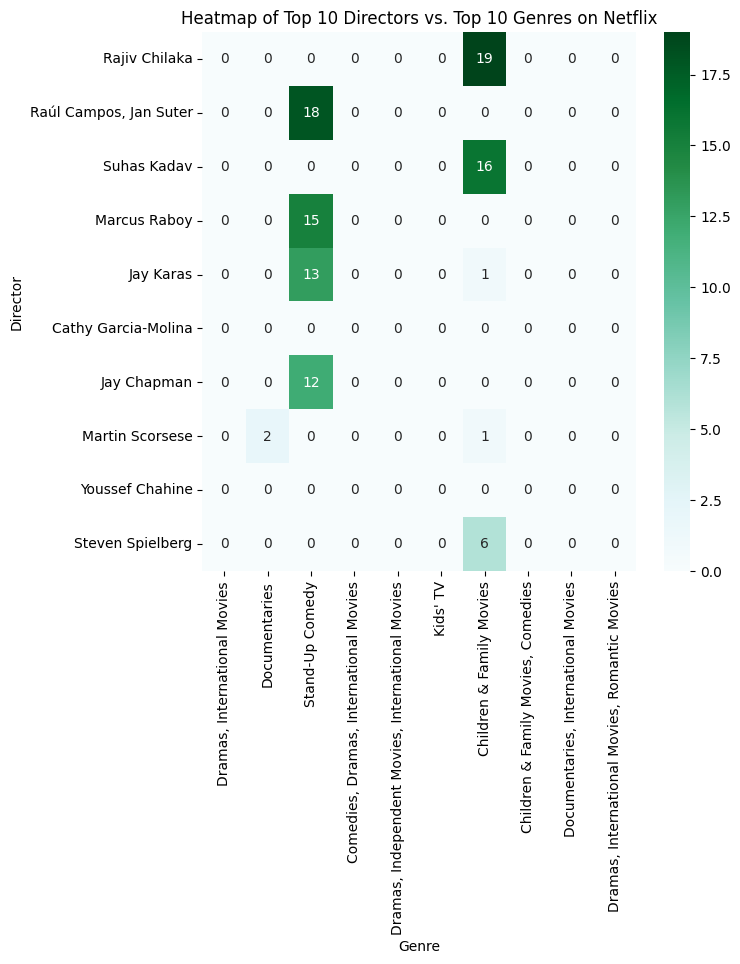

In [ ]:
top_directors = list(df['director'].value_counts().head(10).index)
top_genres = list(df['genre'].value_counts().head(10).index)

top_directors_genres_df = df[df['director'].isin(top_directors)].copy()
top_directors_genres_df['genre'] = top_directors_genres_df['genre'].str.split(', ')
top_directors_genres_df = top_directors_genres_df.explode('genre')

top_directors_genres_df = top_directors_genres_df[top_directors_genres_df['genre'].isin(top_genres)].copy()

director_genre_pivot = top_directors_genres_df.pivot_table(index='director', columns='genre', aggfunc='size', fill_value=0)

director_genre_pivot = director_genre_pivot.reindex(index=top_directors, columns=top_genres, fill_value=0)

plt.figure(figsize=(7,7))
sns.heatmap(director_genre_pivot, annot=True, cmap='BuGn')
plt.title('Heatmap of Top 10 Directors vs. Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Director')
plt.xticks(rotation=90)
plt.show()

##### **Insights:**

1.  **Rajiv Chilaka and Suhas Kadav** have a strong focus on **Children & Family Movies**
2.  **Raúl Campos, Jan Suter, Marcus Raboy and Jay Karas** primarily direct **Stand-Up Comedy**

## **OVERALL ACTIONABLE INSIGHTS**

Based on the analysis of the netflix.csv database, here are some actionable insights for Netflix:

1. **DIVERSIFY THE CONTENT LIBRARY:** The data reveals a significant imbalance, with **movies outnumbering TV shows** by a large margin. To attract new subscribers, Netflix should consider **allocating more resources toward producing/acquiring a greater number of TV shows**.

2. **EXPAND GEOGRAPHIC CONTENT SOURCING:** The content library is **heavily skewed towards titles from the United States, India, and the United Kingdom**. To engage global audience and reduce reliance on a few key markets, Netflix **should strategically invest in content from other countries/regions**.

3.  **CONTINUED INVESTMENTS IN HIGH-PERFORMING GENRES**: Given that 'International Movies', 'Dramas', and 'Comedies' are the most prevalent genres, Netflix could prioritize content acquisition and production in these areas. This would not only satisfy the existing audience but also leverage popular categories for targeted marketing and promotion.

3.  **FORM EXCLUSIVE CREATOR PARTNERSHIPS**: Considering that a small number of directors are responsible for a large volume of titles, exclusive partnerships should be forged with these high-volume creators to ensure a consistent stream of popular content.

4.  **IMPROVE DATA QUALITY AND VALIDATION TOOLS:** The presence of incorrect and Null/NaN data entries highlights the need for a more robust data validation process. Implementing **automated checks** or **data-cleaning protocols** would improve the accuracy of the database and lead to more reliable business decisions.

Data Analysized by: **RADHIKA AGRAWAL**